In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

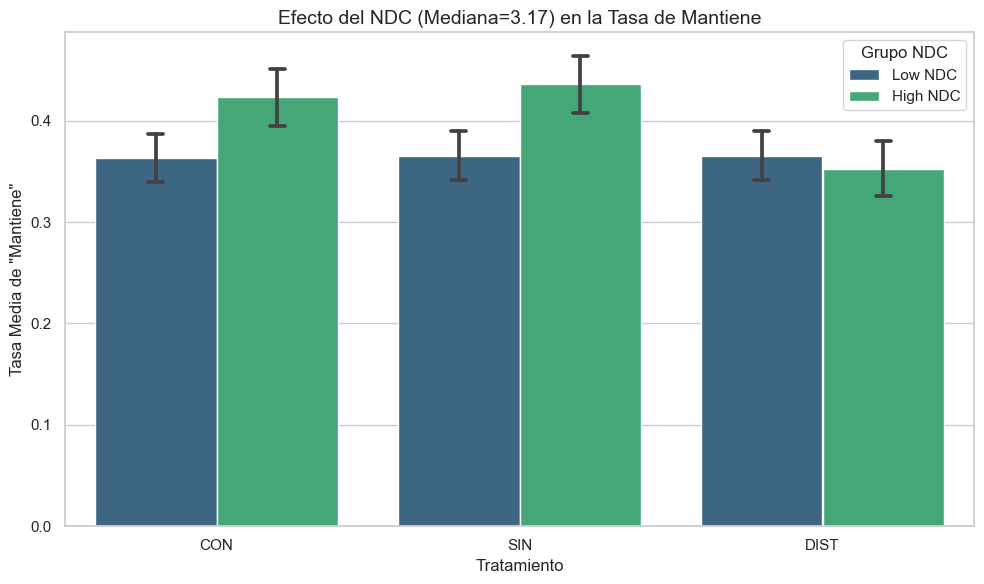

  Condicion NDC_Group  count   mean    std
0       CON  High NDC    312  0.423  0.495
1       CON   Low NDC    402  0.363  0.482
2      DIST  High NDC    312  0.353  0.479
3      DIST   Low NDC    402  0.366  0.482
4       SIN  High NDC    312  0.436  0.497
5       SIN   Low NDC    402  0.366  0.482


In [2]:
# 1. Cargar datos y estandarizar condiciones
df = pd.read_csv('../data/processed/df_long.csv')
def map_condicion(name):
    if 'CON' in name.upper(): return 'CON'
    if 'SIN' in name.upper(): return 'SIN'
    if 'DIST' in name.upper(): return 'DIST'
    return name
df['Condicion'] = df['Dilema'].apply(map_condicion)

# 2. Dividir por la mediana del NDC (Calculada sobre sujetos únicos)
median_ndc = df.drop_duplicates('ID_Sujeto')['NDC_Score'].median()
df['NDC_Group'] = df['NDC_Score'].apply(lambda x: 'High NDC' if x > median_ndc else 'Low NDC')

# 3. Graficar la comparación
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Usamos barplot para comparar las tasas de "Mantiene"
ax = sns.barplot(data=df, x='Condicion', y='Mantiene', hue='NDC_Group', 
                 hue_order=['Low NDC', 'High NDC'], order=['CON', 'SIN', 'DIST'],
                 palette='viridis', errorbar='se', capsize=.05)

plt.title(f'Efecto del NDC (Mediana={median_ndc:.2f}) en la Tasa de Mantiene', fontsize=14)
plt.ylabel('Tasa Media de "Mantiene"', fontsize=12)
plt.xlabel('Tratamiento', fontsize=12)
plt.legend(title='Grupo NDC')
plt.tight_layout()
plt.show()

# 4. Generar tabla de datos
resumen_ndc = df.groupby(['Condicion', 'NDC_Group'])['Mantiene'].agg(['count', 'mean', 'std']).reset_index()
print(resumen_ndc.round(3))

=== TABLA DE DATOS: PROMEDIOS POR GRUPO NDC ===
Grupo NDC Tratamiento  N (Sujetos)  Media  Desv. Estándar
 High NDC         CON           54  0.414           0.303
 High NDC        DIST           54  0.343           0.287
 High NDC         SIN           54  0.420           0.325
  Low NDC         CON           67  0.363           0.236
  Low NDC        DIST           67  0.366           0.234
  Low NDC         SIN           67  0.366           0.253


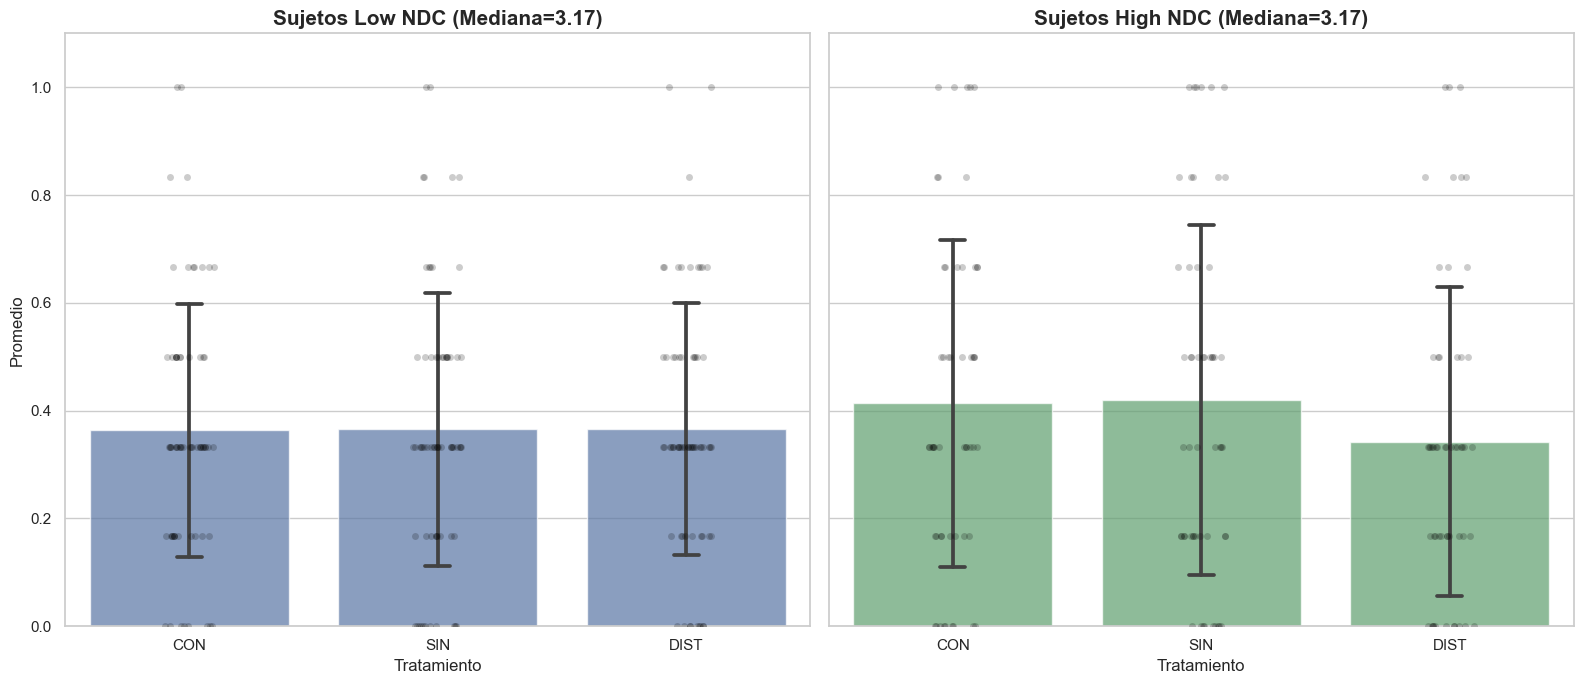

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cols_promedio = ['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST']
df_u = df.drop_duplicates(subset=['ID_Sujeto'])[['ID_Sujeto', 'NDC_Score'] + cols_promedio]

# 2. Dividir grupos NDC por la mediana
median_ndc = df_u['NDC_Score'].median()
df_u['NDC_Group'] = df_u['NDC_Score'].apply(lambda x: 'High NDC' if x > median_ndc else 'Low NDC')

# 3. Transformar a formato largo para el análisis
df_plot = df_u.melt(id_vars=['ID_Sujeto', 'NDC_Group'], 
                    value_vars=cols_promedio,
                    var_name='Tratamiento', value_name='Promedio')
df_plot['Tratamiento'] = df_plot['Tratamiento'].str.replace('Promedio_', '')

# 4. GENERAR E IMPRIMIR LA TABLA RESUMEN
tabla_resumen = df_plot.groupby(['NDC_Group', 'Tratamiento'])['Promedio'].agg(['count', 'mean', 'std']).reset_index()
tabla_resumen.columns = ['Grupo NDC', 'Tratamiento', 'N (Sujetos)', 'Media', 'Desv. Estándar']
# Ordenar para claridad
tabla_resumen = tabla_resumen.sort_values(by=['Grupo NDC', 'Tratamiento'])

print("=== TABLA DE DATOS: PROMEDIOS POR GRUPO NDC ===")
print(tabla_resumen.round(3).to_string(index=False))

# 5. Crear los dos gráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
sns.set_theme(style="whitegrid")

grupos = ['Low NDC', 'High NDC']
colores = ['#4c72b0', '#55a868'] # Azul para Low, Verde para High

for i, grupo in enumerate(grupos):
    data_g = df_plot[df_plot['NDC_Group'] == grupo]
    
    # Dibujar barras con media y desviación estándar
    sns.barplot(ax=axes[i], data=data_g, x='Tratamiento', y='Promedio', 
                order=['CON', 'SIN', 'DIST'], errorbar='sd', capsize=.1, color=colores[i], alpha=0.7)
    
    # Agregar puntos individuales para ver la dispersión real
    sns.stripplot(ax=axes[i], data=data_g, x='Tratamiento', y='Promedio', 
                  order=['CON', 'SIN', 'DIST'], color='black', alpha=0.2, jitter=True)
    
    axes[i].set_title(f'Sujetos {grupo} (Mediana={median_ndc:.2f})', fontsize=15, fontweight='bold')
    axes[i].set_ylim(0, 1.1)
    axes[i].set_ylabel('Promedio' if i == 0 else "")

plt.tight_layout()
plt.show()

In [3]:
# Calcular la mediana del NDC basada en sujetos únicos 
median_ndc = df.drop_duplicates('ID_Sujeto')['NDC_Score'].median()

# 3. Identificar a los grupos y filtrar solo los "High NDC"
# Se consideran "High NDC" aquellos con un score mayor a la mediana
df_high_ndc = df[df['NDC_Score'] > median_ndc].copy()

# 4.Guardar el nuevo DataFrame en un archivo CSV
df_high_ndc.to_csv('../data/processed/df_high_ndc.csv', index=False)

# Verificar el resultado
print(f"Sujetos totales en el nuevo DF: {df_high_ndc['ID_Sujeto'].nunique()}")

Sujetos totales en el nuevo DF: 52


In [8]:
df_expectativas_ndc = df_high_ndc[df_high_ndc['Expectativa_Activa'] != 0].copy()
# Verificar el resultado
print(f"Sujetos totales en el nuevo DF: {df_expectativas_ndc['ID_Sujeto'].nunique()}")
# 4.Guardar el nuevo DataFrame en un archivo CSV
df_expectativas_ndc.to_csv('../data/processed/df_expectativas_ndc.csv', index=False)

Sujetos totales en el nuevo DF: 48
